In [2]:
pip install --upgrade networkx

   source  target
0       0       1
1       0       2
2       0       3
3       0       4
4       0       5
Adjacency Matrix Shape: (4039, 4039)
Cluster Labels: [3 3 3 ... 4 4 4]
Silhouette Score: -1.0


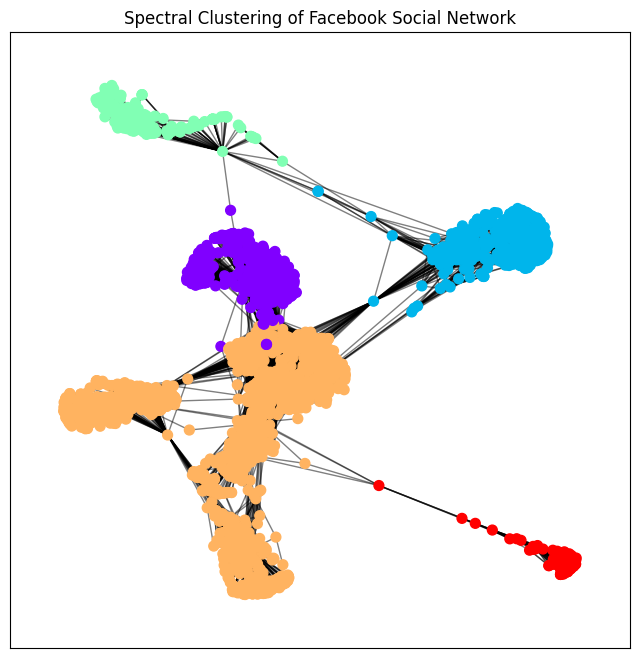

In [3]:
# Step 1: Data Preparation

# Import necessary libraries
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score

# 1.1 Load the Facebook social network dataset
url = "https://snap.stanford.edu/data/facebook_combined.txt.gz"
fb_data = pd.read_csv(url, delimiter=" ", header=None, names=["source", "target"])

# View the first few rows
print(fb_data.head())

# 1.2 Convert the dataset into a similarity graph
# Create a graph from the Facebook dataset
G = nx.from_pandas_edgelist(fb_data, "source", "target")

# Convert the graph to an adjacency matrix using to_numpy_array (updated method)
adj_matrix = nx.to_numpy_array(G)

print("Adjacency Matrix Shape:", adj_matrix.shape)

# Step 2: Implementing Spectral Clustering

# 2.1 Apply Spectral Clustering
n_clusters = 5  # You can choose the number of clusters based on your analysis
spectral_model = SpectralClustering(n_clusters=n_clusters, affinity="precomputed", random_state=42)

# Fit the model and predict cluster labels
labels = spectral_model.fit_predict(adj_matrix)

print("Cluster Labels:", labels)

# Step 3: Evaluating Clustering Results

# 3.1 Performance Metrics - Silhouette Score
sil_score = silhouette_score(adj_matrix, labels, metric="precomputed")
print("Silhouette Score:", sil_score)

# 3.2 Visualizing the Clusters
plt.figure(figsize=(8, 8))
pos = nx.spring_layout(G)  # Position nodes using Fruchterman-Reingold force-directed algorithm

# Draw nodes, coloring them based on cluster labels
nx.draw_networkx_nodes(G, pos, node_size=50, node_color=labels, cmap=plt.cm.rainbow)

# Draw edges
nx.draw_networkx_edges(G, pos, alpha=0.5)

# Add title to the plot
plt.title("Spectral Clustering of Facebook Social Network")
plt.show()

# Step 4: Analysis and Interpretation

# 4.1 Analyze the Cluster Quality
if sil_score > 0.5:
    print(f"The clustering is good with a silhouette score of {sil_score}.")
elif 0.2 <= sil_score <= 0.5:
    print(f"The clustering is moderate with a silhouette score of {sil_score}.")
else:
    print(f"The clustering is poor with a silhouette score of {sil_score}. Consider tuning parameters.")

# 4.2 Cluster Characteristics
import numpy as np
unique, counts = np.unique(labels, return_counts=True)
cluster_sizes = dict(zip(unique, counts))

print("\nCluster Sizes:")
for cluster, size in cluster_sizes.items():
    print(f"Cluster {cluster}: {size} nodes")

# 4.3 Insights and Patterns
largest_cluster = max(cluster_sizes, key=cluster_sizes.get)
smallest_cluster = min(cluster_sizes, key=cluster_sizes.get)

print(f"\nThe largest cluster is Cluster {largest_cluster} with {cluster_sizes[largest_cluster]} nodes.")
print(f"The smallest cluster is Cluster {smallest_cluster} with {cluster_sizes[smallest_cluster]} nodes.")

# 4.4 Analyzing Inter-cluster Connections
cluster_degrees = {}
for cluster in unique:
    cluster_nodes = [node for node, label in enumerate(labels) if label == cluster]
    cluster_subgraph = G.subgraph(cluster_nodes)
    avg_degree = sum(dict(cluster_subgraph.degree()).values()) / len(cluster_subgraph)
    cluster_degrees[cluster] = avg_degree

print("\nAverage Degree of Nodes in Each Cluster:")
for cluster, avg_deg in cluster_degrees.items():
    print(f"Cluster {cluster}: {avg_deg:.2f} average connections per node")

# 4.5 Pattern Interpretation
print("\nInterpretation of Clustering Results:")
if sil_score > 0.5:
    print("The clusters are well-defined and separate distinct communities within the network.")
elif 0.2 <= sil_score <= 0.5:
    print("The clusters overlap to some extent, suggesting communities that are not perfectly distinct.")
else:
    print("The clusters are poorly separated, indicating that the community structure is not clear.")

if largest_cluster > 0.6 * len(labels):
    print(f"Cluster {largest_cluster} dominates the network, suggesting one large connected community.")
if smallest_cluster < 0.05 * len(labels):
    print(f"Cluster {smallest_cluster} is very small, potentially an isolated or specialized group.")